<a href="https://colab.research.google.com/github/sefayehalilova/ROIM/blob/master/bic_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Критерий Акаике (Akaike's information criterion, AIC) - критерий выбора из класса параметризованных регрессионных моделей; критерий,оценивающий модели с разным числом параметров. Порядок выбора модели не важен.  

В общем случае формула такая:  
AIC=2*k-n*ln(L), где k-число параметров, L-функция правдоподобия. Здесь высчитывается MSE(Среднее квадратичное отклонение).  
AIC в отличие от BIC содержит функцию штрафа, которая линейно зависит от числа параметров.  

Байесовский информационный критерий (Bayesian information criterion, BIC) - критерий выбора модели из класса параметризованных моделей, зависящих от разного числа параметров.  
Штрафует увеличение числа параметров модели, устраняя проблему переобучения.  
Формула:  
BIC=n*ln(L)+k*ln(n).


In [ ]:
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
dataset, y = make_regression(100,100,10,noise=0.5,random_state=2)
#dataset, y = make_regression(20, 20, 2, noise=0.5)
dataset = pd.DataFrame(dataset)

In [ ]:
indexes = []
scores_train = []
scores_test = []
AICS = []
BICS = []
MSE_train = []
MSE_test = []

In [ ]:
# AIC
def calculate_aic(n, mse, num_params):
    aic = n*log(mse) + 2 * num_params
    return abs(aic)

# BIC
def calculate_bic(n, mse, num_params):
    bic = n*log(mse) + num_params * log(n)
    return abs(bic)


In [ ]:
for i in range(1, len(dataset.columns)):
    X=dataset[dataset.columns[:i]] #объявляем данные
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5,random_state=4)#разбиваем данные на тренировочные и тестовые
    LR = LinearRegression()
    LR.fit(X_train, y_train)#обучаем выборку
    prediction_test = LR.predict(X_test)#считаем вероятности принадлежания к классу
    prediction_train = LR.predict(X_train)
    mse_train = mean_squared_error(y_train, prediction_train)#считаем среднее квадратичное отклонение
    mse_test = mean_squared_error(y_test, prediction_test)
    aic = calculate_aic(len(y), mse_train, i)
    bic = calculate_bic(len(y), mse_train, i)
    AICS.append(mse_train + aic)
    BICS.append(mse_train + bic)
    MSE_test.append(mse_test)
    MSE_train.append(mse_train)
    indexes.append(i)

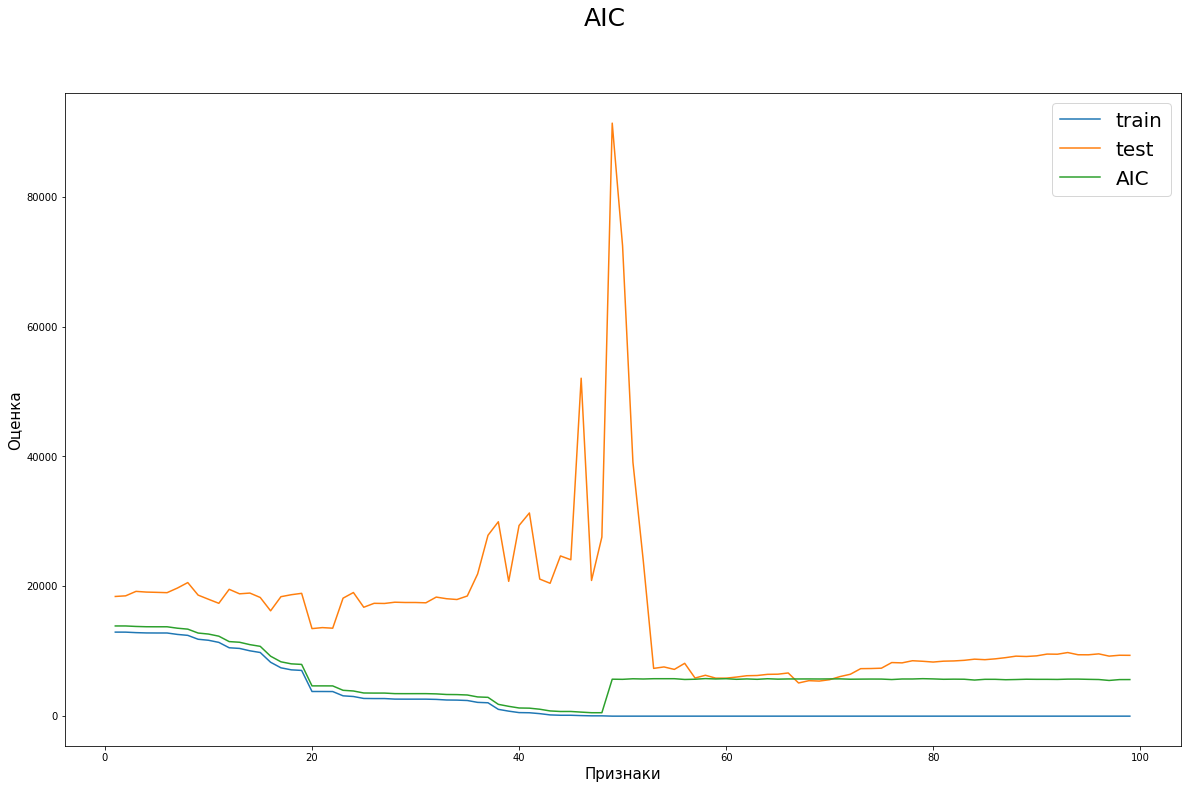

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(indexes, MSE_train)
plt.plot(indexes, MSE_test)
plt.plot(indexes, AICS)
plt.legend(['train', 'test', 'AIC'], fontsize='20')
plt.suptitle('AIC', fontsize="25")
plt.xlabel('Признаки', fontsize="15")
plt.ylabel('Оценка', fontsize="15")
plt.show()


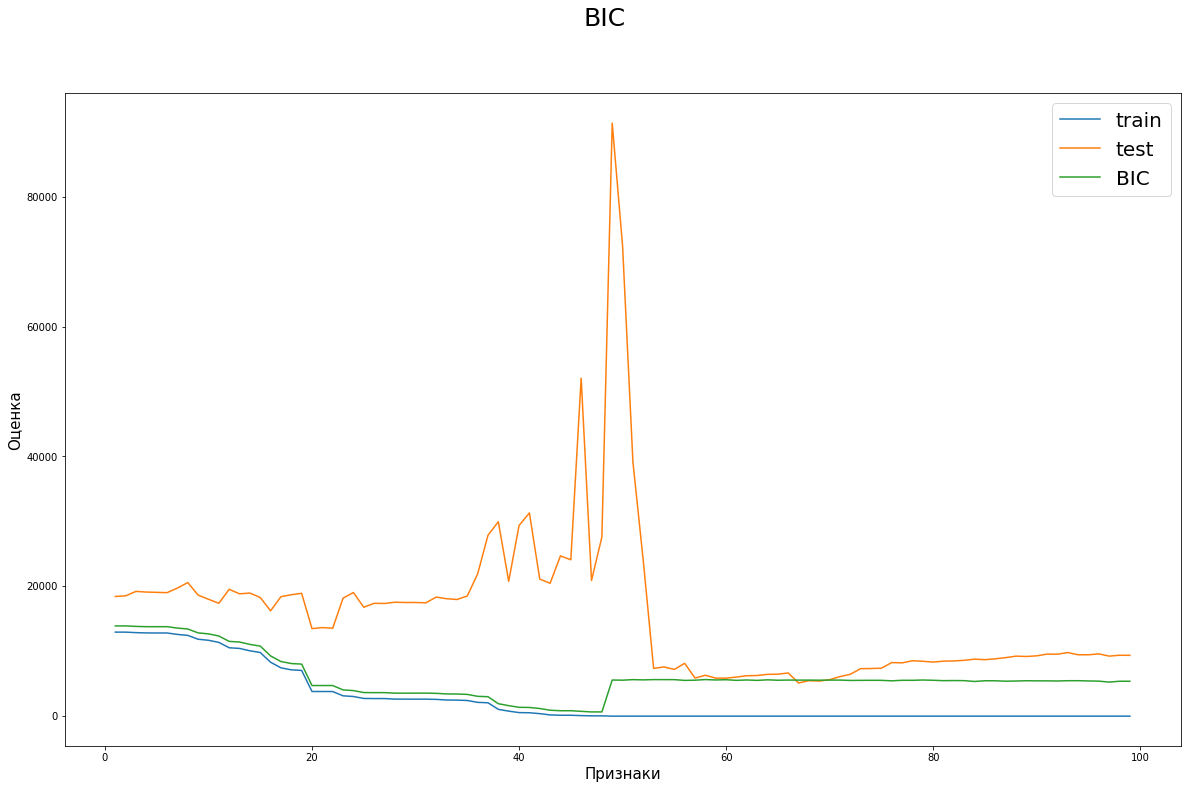

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(indexes, MSE_train)
plt.plot(indexes, MSE_test)
plt.plot(indexes, BICS)
plt.legend(['train', 'test', 'BIC'], fontsize='20')
plt.suptitle('BIC', fontsize="25")
plt.xlabel('Признаки', fontsize="15")
plt.ylabel('Оценка', fontsize="15")
plt.show()